## Image processing

In [65]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from PIL import ImageFont, ImageDraw, Image

### 정규분포 그래프
<img src=normal_distribution.png width=500>

크로마키 이미지를 어떻게 구분할까? 
정규분포 그래프를 이용해서, 평균과 표준편차 조건에 맞는 부분을 배경처리함

In [3]:
# 평균이 78이고 표준편차가 12일때 90이상일 확률
sp.norm(78,12).pdf(90)

0.020164227043261946

In [4]:
# 평균이 9일때, 7이라는 값이 나올 확률을 정규화(Z-score)해서 정규분포를 통해 얻음
t = 7
p = sp.norm(0,1).pdf((9-7)/4) 
print(p)

0.3520653267642995


(180, 187, 3)
9
255
19


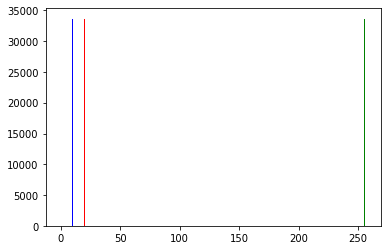

In [3]:
train = cv2.imread("patch3.png")    
print(train.shape)
b,g,r = cv2.split(train)
hb = plt.hist(b.ravel(), 256, [0,256], color='b') 
hg = plt.hist(g.ravel(), 256, [0,256], color='g') 
hr = plt.hist(r.ravel(), 256, [0,256], color='r') 
maxb = (np.where( hb[0] == np.max(hb[0])) )[0][0]
maxg = (np.where( hg[0] == np.max(hg[0])) )[0][0]
maxr = (np.where( hr[0] == np.max(hr[0])) )[0][0]
print(maxb)
print(maxg)
print(maxr)

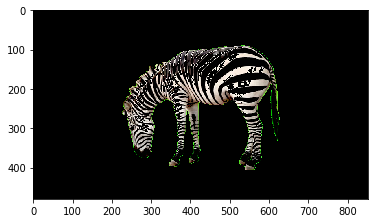

In [4]:
test = cv2.imread("zoo.jpg")
norm = sp.norm(0, 1)
for r in range(test.shape[0]) :
    for c in range(test.shape[1]) :  
        prob = 0
        prob += norm.pdf((test[r,c,0]-maxb)/5)
        prob += norm.pdf((test[r,c,1]-maxg)/6)
        prob += norm.pdf((test[r,c,2]-maxr)/6)        
        if prob > 0.2 :   
            test[r, c, : ] = [0,0,0]               

plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB) ) 

## 화소 점 처리

(512, 512)


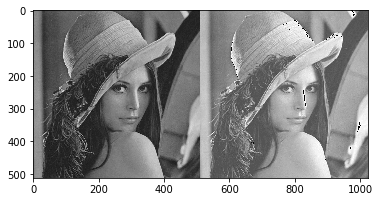

In [5]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
img2 = img + 50    # 모든 원소에 50을 더한 다는 것

plt.imshow(np.hstack([img,img2]), cmap="gray")

# 클래핑되지 않은 영역이 제대로 표시되지 않음.
# 이것을 해결해보자

In [6]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
print(type(img))   # 이미지는 다차원 객체이다. <class 'numpy.ndarray'>
print(type(img[0,0]))  # <class 'numpy.uint8'>

<class 'numpy.ndarray'>
<class 'numpy.uint8'>


'\n주의! for 문장을 가급적이면 사용하지않도록 한다.\n인터프리터 언어이기 때문에 루프를 도는데 오래걸림\n'

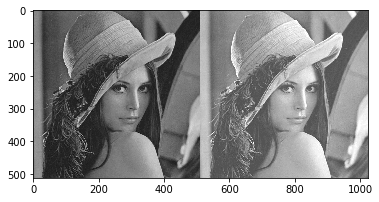

In [7]:
# img2 = np.array(img, dtype='int')
img2 = img.astype(np.int)      # 이미지를 int로 변환해줌
img2 += 50
img2 = np.clip(img2, 0, 255)   # clip함수로 최대최소값 지정
img2 = img2.astype(np.uint8)   # uint8 값으로 변환

plt.imshow(np.hstack([img,img2]), cmap="gray")

'''
주의! for 문장을 가급적이면 사용하지않도록 한다.
인터프리터 언어이기 때문에 루프를 도는데 오래걸림
'''

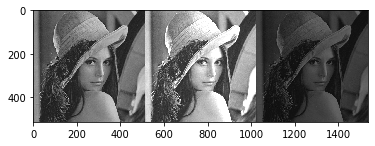

In [8]:
img2 = img.astype(np.float32)  # 이미지를 float로 변환해줌(실수연산)
img2 *= 1.5
img2 = np.clip(img2, 0, 255)   
img2 = img2.astype(np.uint8)   

img3 = img.astype(np.float32)  
img3 *= 0.5
img3 = np.clip(img3, 0, 255)   
img3 = img3.astype(np.uint8)   

plt.imshow(np.hstack([img,img2,img3]), cmap="gray")

In [ ]:
# 불가능!
a = [1,6,7,9]
b = a + 10
# 가능!
a = np.array([1,6,7,9])
b = a + 10 

In [9]:
a = np.array([250,254], dtype='uint8')
b = a + 10
print(b)   
# [4 8] 
# unit8는 0 ~ 255까지 양수만 저장 가능하기때문에 

a = np.array([250, 20, 254], dtype='int')
b = a + 10
print(b)
# [260  30 264]  타입변환이 필요하다

c = np.clip(b, 0, 255)
print(c)
# [255  30 255]  
# clip함수가 필요한 이유. 최대최소값을 지정해서 0 ~ 255까지만 표시

d = np.array(c, dtype="uint8") 
print(d)
# [255  30 255]

# -----------------이미지 클래핑을 위해 이러한 과정이 필요----------

e = [1, 1.0, 2]
f = np.array(e)

print(type(e[0]))   # <class 'int'>
print(type(e[1]))   # <class 'float'> 리스트는 이종데이터를 묶을 수 있다.
print(type(f[0]))   # <class 'numpy.float64'>
print(type(f[1]))   # <class 'numpy.float64'> numpy는 고속처리를 위해 자료타입을 동일하게 맞춘다.

[4 8]
[260  30 264]
[255  30 255]
[255  30 255]
<class 'int'>
<class 'float'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [ ]:
'''
LUT테이블 

a = [0,1,4]
LUT = [2,3,4,5,6]

0픽셀 값은 2로
1픽셀 값은 3으로
4픽셀 값은 4로
'''

In [ ]:
lut1 = [ x for x in range(256)]
print(lut1)


lut1 = []
for i in range(256) :
    lut1.append(i)
print(lut1)

# 둘이 같은 코딩임

In [10]:
lut1 = [ x for x in range(10)]
print(lut1)

lut2 = [ x+5 for x in range(10)]
print(lut2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [11]:
# 퀴즈 : 최소 크기가 5, 최대 크기가 9가 되도록 표현하기

lut3 = np.clip(lut2, 0, 9)
print(lut3)

lut4 = [ x+5 if x+5<=9 else 9 for x in range(10)]
print(lut4)

[5 6 7 8 9 9 9 9 9 9]
[5, 6, 7, 8, 9, 9, 9, 9, 9, 9]


In [12]:
def addlut(op):
    return [ x+op if x+op<255 else 255 for x in range(256)]

print(addlut(10))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,

In [13]:
lut1 = [ x*x for x in range(10)]
print(lut1)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


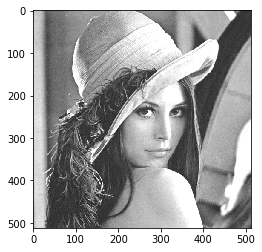

In [14]:
def mullut(op):
    return np.array([x*op if x*op<255 else 255 
                     for x in range(256)]).astype('uint8')
    # 리스트값이므로 넘파이값으로 바꿔줘야한다.

src2 = cv2.LUT(img, mullut(1.5))
#print(src2)
plt.imshow(src2, cmap='gray')

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


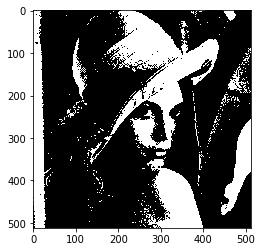

In [15]:
def binarilut(t):
    return np.array([255 if x>t else 0 
                     for x in range(256)]).astype('uint8')

src3 = cv2.LUT(img, binarilut(127))
print(src3)
plt.imshow(src3, cmap='gray')

[[116 122 125 ... 216 216 216]
 [119 119 119 ... 216 216 221]
 [122 122 123 ... 216 212 216]
 ...
 [149 146 137 ... 205 209 212]
 [152 144 139 ... 205 212 216]
 [152 144 138 ... 212 221 221]]


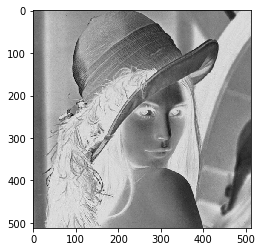

In [19]:
def inverselut():
    return np.array([255-x for x in range(256)]).astype('uint8')

src5 = cv2.LUT(img, inverselut())
print(src5)
plt.imshow(src5, cmap='gray')

[[120 120 120 ...   0   0   0]
 [120 120 120 ...   0   0   0]
 [120 120 120 ...   0   0   0]
 ...
 [ 60  60  60 ...   0   0   0]
 [ 60  60  60 ...   0   0   0]
 [ 60  60  60 ...   0   0   0]]


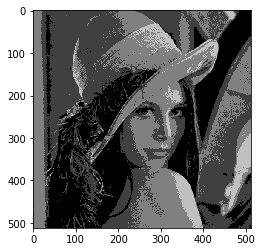

In [17]:
def posterlut(l):
    return np.array([ int(x/l)*l for x in range(256)]).astype('uint8')

src6 = cv2.LUT(img, posterlut(60))
print(src6)
plt.imshow(src6, cmap='gray')

## Gamma Correction

[[193.53339569 189.69041635 187.73343309 ... 108.60991286 108.60991286
  108.60991286]
 [191.62346684 191.62346684 191.62346684 ... 108.60991286 108.60991286
  102.04343294]
 [189.69041635 189.69041635 189.0407892  ... 108.60991286 113.53870642
  108.60991286]
 ...
 [171.1007272  173.285105   179.648183   ... 121.59546367 117.07314754
  113.53870642]
 [168.88236085 174.72318723 178.25769043 ... 121.59546367 113.53870642
  108.60991286]
 [168.88236085 174.72318723 178.95455736 ... 113.53870642 102.04343294
  102.04343294]]


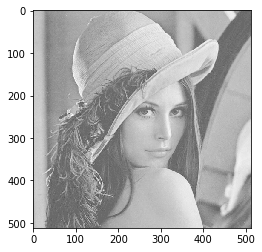

In [21]:
def gammalut(gamma):
    invGamma = 1.0 / gamma
    return np.array([((i/255.0) ** invGamma) * 255 for i in np.arange(0,256)])

src7 = cv2.LUT(img, gammalut(2.2))
print(src7)
plt.imshow(src7, cmap='gray')

(512, 512)
(512, 512, 3)


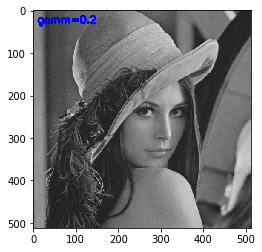

In [25]:
img = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
col = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
print(col.shape)

cv2.putText(col, "gamm=0.2", (10,30),     # 글자가 표시 될 좌표
           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255),3)
                      #폰트 이름 / 크기 / RGB 순. 파란색 글씨 / 굵기
plt.imshow(col)

In [51]:
img = cv2.imread("gamma.jpg")
col = cv2.LUT(img, gammalut(0.5))


cv2.putText(col, "gamma=0.5", (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g1.jpg", col)

col = cv2.LUT(img, gammalut(1.5))
cv2.putText(col, "gamma=1.5", (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g2.jpg", col)

col = cv2.LUT(img, gammalut(2.5))
cv2.putText(col, "gamma=2.5", (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 0), 2)
cv2.imwrite("g3.jpg", col)

True

In [74]:
gm = [0.5,1.2,2.5,3.0]
for i in range(len(gm)) :
    col = cv2.LUT(img, gammalut(gm[i]))
    cv2.putText(col, f"gamma={gm[i]}", (10,150),
                cv2.FONT_HERSHEY_SIMPLEX, 3, (255,255,0),5)
    cv2.imwrite(f"g{i+1}.jpg", np.hstack([img,col]))

## Gif 만들기

In [75]:
from PIL import Image
im1 = Image.open('g1.jpg')
im2 = Image.open('g2.jpg')
im3 = Image.open('g3.jpg')
im4 = Image.open('g4.jpg')

im1.save("out.gif", save_all=True, append_images=[im2,im3,im4],
        duation=1000, loop=0)

<img src=out.gif width=500>

## 이미지에 한글 쓰기

In [71]:
img = cv2.imread("gamma.jpg")
imgPIL = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

font = ImageFont.truetype("malgun.TTF", 100) 

# 도화지에 먼저 그리고 합치는 것
draw = ImageDraw.Draw(imgPIL)
draw.text((60,70), "안녕", font=font, fill=(255,0,0))
imgPIL.save("out.jpg")

<img src=out.jpg width=200>

## 역광 보정
- 영역별로 LUT를 조절해줌으로써 보정할 수 있다

## 화소영역처리의 개념
> 엠보싱 효과
- 입력영상을 양각형태로 보이게 하는 기술

> 블러링
- 회선마스크를 평균화(?) 한다는 것은, 블러링이 된다는 것
- 영상의 세밀한 부분을 제거하여 영상을 흐리게 하거나 부드럽게 하는 기술
- 영상의 세밀한 부분은 주파수 축에서 보면 고주파 성분인데, 블러링은 이 고주파 성분을 제거해 줌. <br> (가장자리를 제로를 채우는 제로패딩을 사용하기때문에. 그래야 영상크기가 커지지 않고 동일하게 나올 수 있다.)
- 사용하는 가중치의 회선 마스크는 저역통과 필터(Low Pass Filter)가 됨. <br> 즉, 블러링을 low pass filter라고 하기도 한다.
    
> 샤프닝
- 블러링과는 반대로 디지털 영상에서 상세한 부분을 더욱 강조하여 표현
- 영상의 상세한 부분은 고주파 성분이므로 영상에서 저주파 성분만 제거하면 샤프닝 효과를 얻을 수 있음 
- 사용되는 가중치의 회선 마스크는 고역통과 필터(High Pass Filter)가 됨

> 경계선 검출
- 디지털 영상의 경계선을 찾아내는 기술 
- 경계선은 영상의 밝기가 낮은 값에서 높은 값으로 또는 높은 값에서 낮은 값으로 변하는 지점에 있으므로 입력한 영상의 정보가 많이 듦.

<br>

**영상에서 주로 관심 있는 것은 고주파 영역!**

<br>
<br>

In [78]:
K = 11
kernel = np.ones((K,K), np.float32) / (K*K)
print(kernel)
# 이러한 회선 마스크를 영상에 적용

[[0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00826446]
 [0.00826446 0.00826446 0.00826446 0.00826446 0.00826446 0.00826446
  0.00826446 0.00826446 0.00826446 0.00826446 0.00

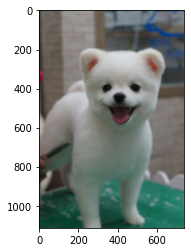

In [79]:
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

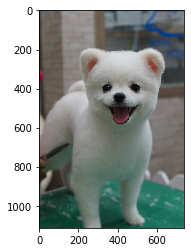

In [80]:
# 원래 사진 그대로 출력됨
kernel = np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

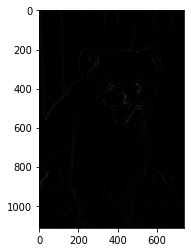

In [81]:
# 엣지 값만 출력 됨
kernel = np.array([[0,0,0],
                  [-1,0,1],
                  [0,0,0]])
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

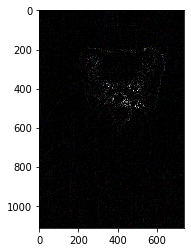

In [82]:
kernel = np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])
iltered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))

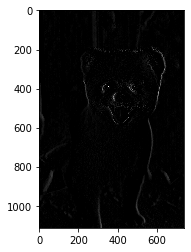

In [85]:
img = cv2.imread("gamma.jpg", cv2.IMREAD_GRAYSCALE)

# 수직 차에 변화가 있는 것을 표시 (수직 edge??)
kernel = np.array([[1,0,-1],
                  [1,0,-1],
                  [1,0,-1]])
filtered = cv2.filter2D(img, -1, kernel)
plt.imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB))